# 4Geeks Insurance S.L.

## Problem statement and data collection

In [64]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.feature_selection import f_regression, SelectKBest
from pickle import dump

In [65]:
total_data = pd.read_csv("/workspaces/machine-learning-linear-regression/data/raw/medical_insurance_cost.csv")
total_data.head()

,age,sex,bmi,children,smoker,region,charges
0,19,female,27.900,0,yes,southwest,16884.92400
1,18,male,33.770,1,no,southeast,1725.55230
2,28,male,33.000,3,no,southeast,4449.46200
3,33,male,22.705,0,no,northwest,21984.47061
4,32,male,28.880,0,no,northwest,3866.85520


## Data exploration and cleaning

In [66]:
total_data.shape

(1338, 7)

In [67]:
total_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1338 entries, 0 to 1337
Data columns (total 7 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   age       1338 non-null   int64  
 1   sex       1338 non-null   object 
 2   bmi       1338 non-null   float64
 3   children  1338 non-null   int64  
 4   smoker    1338 non-null   object 
 5   region    1338 non-null   object 
 6   charges   1338 non-null   float64
dtypes: float64(2), int64(2), object(3)
memory usage: 73.3+ KB


We have 1338 rows and 7 columns including our target (charges).

1) There are no null values.

2) We have 4 variables that are numerical and 3 that are categorical.


### Count and eliminate duplicates

In [68]:
duplicate_count = total_data.duplicated().sum()
duplicate_count

1

In [69]:
total_data.drop_duplicates(inplace=True)
total_data.shape

(1337, 7)

In [70]:
total_data["charges"] = round(total_data["charges"], 2)

In [71]:
total_data.head(10)

,age,sex,bmi,children,smoker,region,charges
0,19,female,27.900,0,yes,southwest,16884.92
1,18,male,33.770,1,no,southeast,1725.55
2,28,male,33.000,3,no,southeast,4449.46
3,33,male,22.705,0,no,northwest,21984.47
4,32,male,28.880,0,no,northwest,3866.86
5,31,female,25.740,0,no,southeast,3756.62
6,46,female,33.440,1,no,southeast,8240.59
7,37,female,27.740,3,no,northwest,7281.51
8,37,male,29.830,2,no,northeast,6406.41
9,60,female,25.840,0,no,northwest,28923.14


### Eliminate irrelevant information

For now i keep all the information

## Analysis of univariate variables

### Analysis on categorical variables

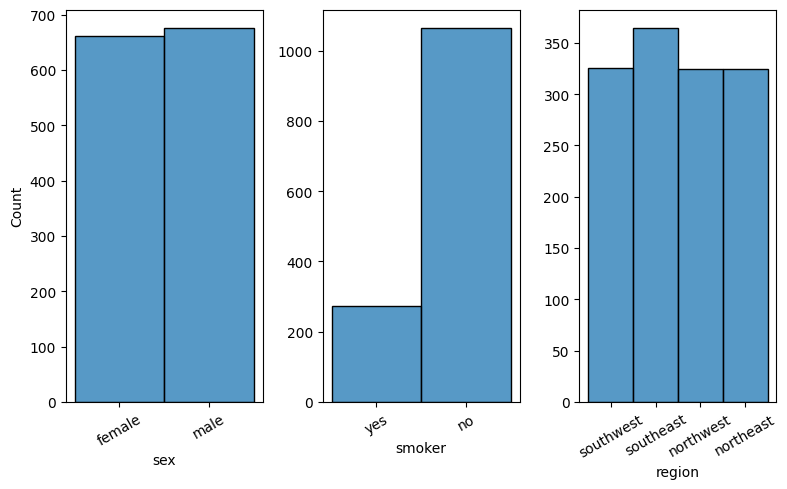

In [72]:
fig, axis = plt.subplots(1, 3, figsize =(8, 5))

sns.histplot(ax = axis[0], data= total_data, x= "sex" )
sns.histplot(ax = axis[1], data= total_data, x= "smoker").set(ylabel = None)
sns.histplot(ax = axis[2], data= total_data, x= "region").set(ylabel = None)

for ax in axis.flat:
    ax.tick_params(axis='x', labelrotation=30)

plt.tight_layout()

plt.show()

In these graphs, we can observe:

1) Sex: The quantity between female and male is nearly equal, with males slightly higher in number.
2) Smoker: The majority of individuals are non-smokers, with an approximate difference of 800 people.
3) Region: The largest number of individuals resides in the southeast, while the rest of the regions are relatively evenly distributed.

### Analysis on numerical variables

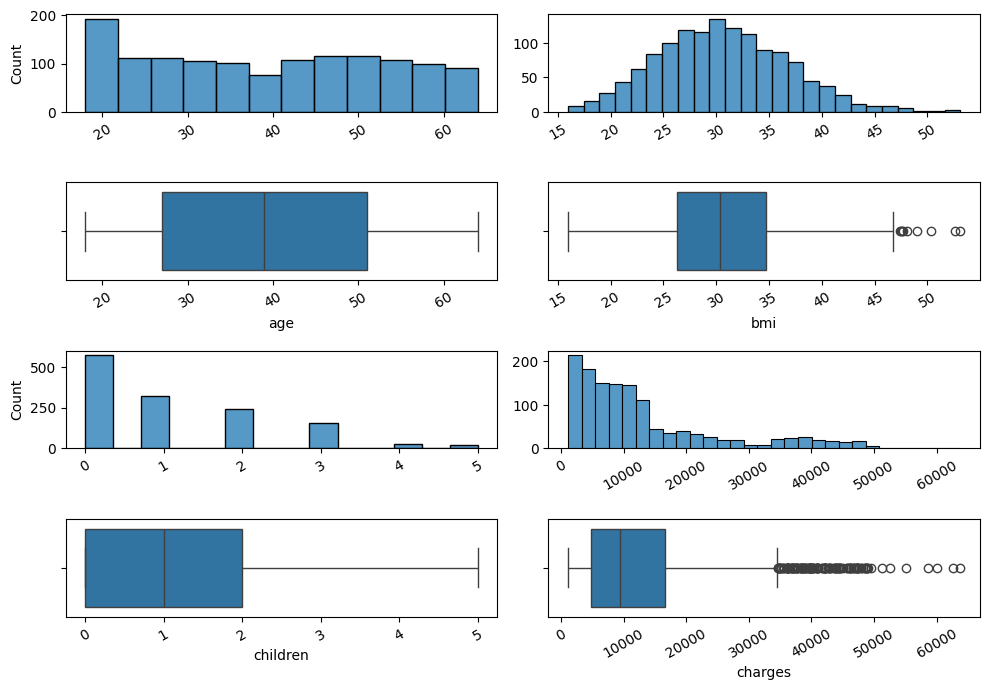

In [73]:
fig, axis = plt.subplots(4, 2, figsize= (10, 7))

sns.histplot(ax = axis[0, 0], data= total_data, x = "age").set(xlabel= None)
sns.boxplot(ax = axis[1, 0], data= total_data, x = "age")
sns.histplot(ax = axis[0, 1], data= total_data, x = "bmi").set(xlabel= None, ylabel= None)
sns.boxplot(ax = axis[1, 1], data = total_data, x = "bmi").set(ylabel= None)
sns.histplot(ax = axis[2, 0], data= total_data, x= "children").set(xlabel= None)
sns.boxplot(ax = axis[3, 0], data= total_data, x= "children").set(ylabel= None)
sns.histplot(ax = axis[2, 1], data= total_data, x = "charges").set(xlabel= None, ylabel= None)
sns.boxplot(ax = axis[3, 1], data = total_data, x = "charges").set(ylabel= None)

for ax in axis.flat:
    ax.tick_params(axis = "x", labelrotation = 30)

plt.tight_layout()

plt.show()

In these graphs, we can observe:

1) Age: We see that the mode is located to the left of the median, with the median being the least common value.
2) BMI: We notice a somewhat asymmetric normal distribution, with the median equal to the mode, and we can observe some outliers.
3) Children: We observe a left-skewed distribution where the mode is to the left of the median.
4) Charges: We also observe that the mode is to the left of the median, and we have some outliers.

## Analysis of multivariate variables

### Numerical-numerical analysis

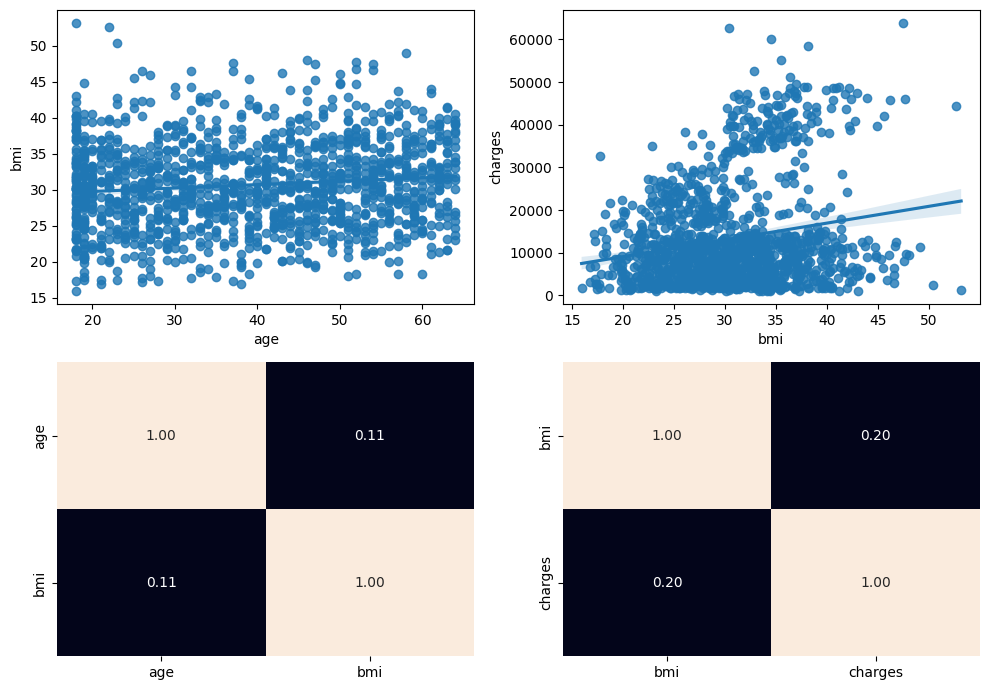

In [74]:
fig, axis = plt.subplots(2, 2, figsize = (10, 7))

sns.regplot(ax = axis[0, 0], data = total_data, x= "age", y= "bmi")
sns.heatmap(data = total_data[["age", "bmi"]].corr(), annot= True, fmt= ".2f", ax = axis[1, 0], cbar = False)
sns.regplot(ax = axis[0, 1], data = total_data, x= "bmi", y= "charges")
sns.heatmap(data = total_data[["bmi", "charges"]].corr(), annot= True, fmt= ".2f", ax = axis[1, 1], cbar = False)

plt.tight_layout()

plt.show()

In the first graph, we can observe that there is no direct correlation between age and bmi.

In the second graph, we can see a very low correlation between bmi and charges.

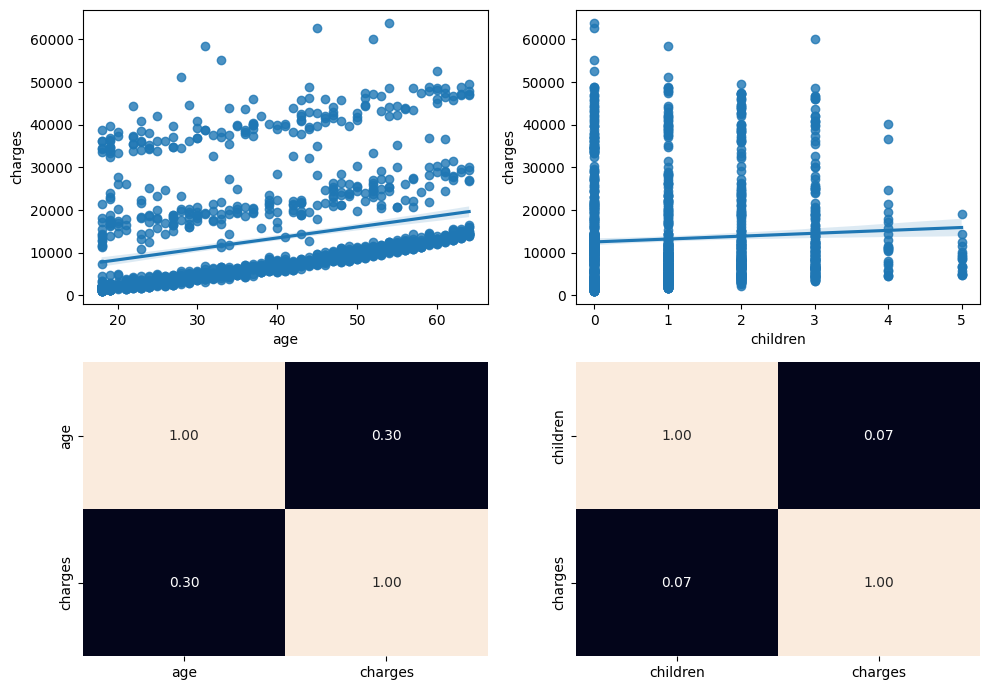

In [75]:
fig, axis = plt.subplots(2, 2, figsize = (10, 7))

sns.regplot(ax = axis[0, 0], data = total_data, x= "age", y= "charges")
sns.heatmap(data = total_data[["age", "charges"]].corr(), annot= True, fmt= ".2f", ax = axis[1, 0], cbar = False)
sns.regplot(ax = axis[0, 1], data = total_data, x= "children", y= "charges")
sns.heatmap(data = total_data[["children", "charges"]].corr(), annot= True, fmt= ".2f", ax = axis[1, 1], cbar = False)

plt.tight_layout()

plt.show()

In the first graph, we can observe a low correlation between age and charges.

In the second graph, we can see that there is no correlation between charges and children.

### Categorical-categorical analysis

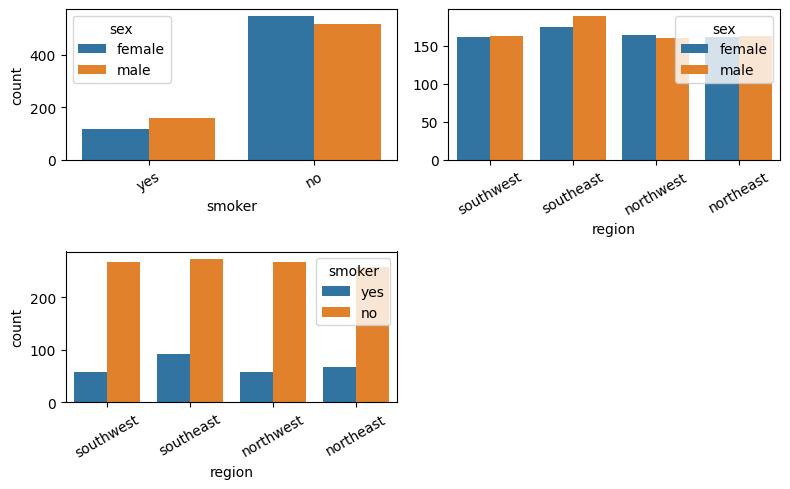

In [76]:
fig, axis = plt.subplots(2, 2, figsize=(8, 5))

sns.countplot(ax = axis[0, 0], data= total_data, x= "smoker", hue= "sex")
sns.countplot(ax = axis[0, 1], data= total_data, x= "region", hue= "sex").set(ylabel = None)
sns.countplot(ax = axis[1, 0], data= total_data, x= "region", hue= "smoker")

for ax in axis.flat:
    ax.tick_params(axis = "x", labelrotation= 30)

plt.delaxes(ax = axis[1, 1])
    
plt.tight_layout()

plt.show()

We can observe in the following graphs:

1) The vast majority of people do not smoke, both males and females.
2) The region with the largest population is the southeast.
3) The region with the highest number of smokers is the southeast.

### Combinations of class with various predictors.

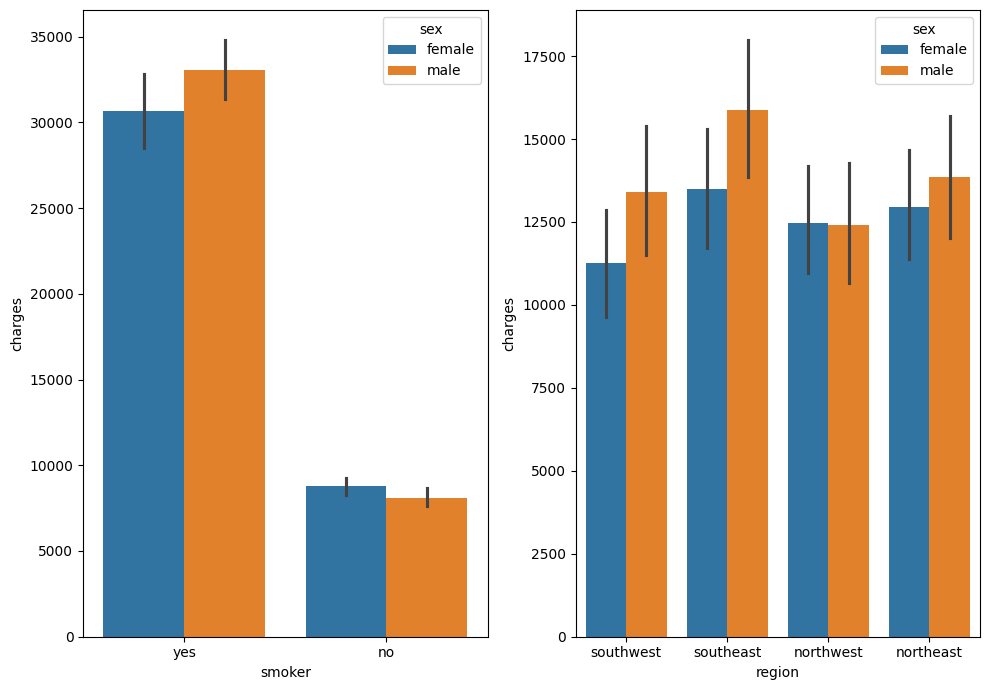

In [77]:
fig, axis = plt.subplots(1, 2, figsize= (10, 7))

sns.barplot(ax= axis[0], data= total_data, x="smoker", y= "charges", hue= "sex")
sns.barplot(ax= axis[1], data= total_data, x= "region", y= "charges", hue= "sex")

plt.tight_layout()
plt.show()

In these graphs, we can observe:

1) Individuals who smoke pay higher insurance charges compared to non-smokers, with male paying the most.
2) The region with the highest charges is the southeast, for both male and female. Additionally, the northwest is the only region where female have higher charges than male.

### Factorize categorical data

In [78]:
total_data["smoker_n"] = pd.factorize(total_data["smoker"])[0]
total_data["region_n"] = pd.factorize(total_data["region"])[0]
total_data["sex_n"] = pd.factorize(total_data["sex"])[0]

In [79]:
total_data.head()

,age,sex,bmi,children,smoker,region,charges,smoker_n,region_n,sex_n
0,19,female,27.900,0,yes,southwest,16884.92,0,0,0
1,18,male,33.770,1,no,southeast,1725.55,1,1,1
2,28,male,33.000,3,no,southeast,4449.46,1,1,1
3,33,male,22.705,0,no,northwest,21984.47,1,2,1
4,32,male,28.880,0,no,northwest,3866.86,1,2,1


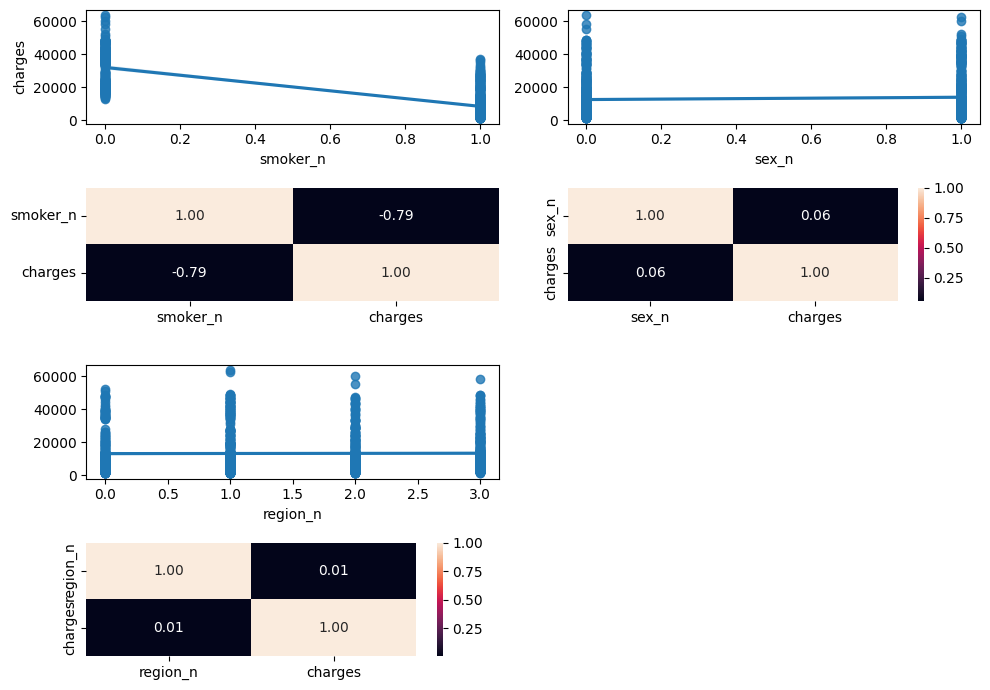

In [80]:
fig, axis = plt.subplots(4, 2, figsize = (10, 7))

# Create a multiple scatter diagram
sns.regplot(ax = axis[0, 0], data = total_data, x = "smoker_n", y = "charges")
sns.heatmap(total_data[["smoker_n", "charges"]].corr(), annot = True, fmt = ".2f", ax = axis[1, 0], cbar = False)
sns.regplot(ax = axis[0, 1], data = total_data, x = "sex_n", y = "charges").set(ylabel=None)
sns.heatmap(total_data[["sex_n", "charges"]].corr(), annot = True, fmt = ".2f", ax = axis[1, 1])
sns.regplot(ax = axis[2, 0], data = total_data, x = "region_n", y = "charges").set(ylabel=None)
sns.heatmap(total_data[["region_n", "charges"]].corr(), annot = True, fmt = ".2f", ax = axis[3, 0])

plt.delaxes(ax= axis[2, 1])
plt.delaxes(ax= axis[3, 1])

# Adjust the layout
plt.tight_layout()

# Show the plot
plt.show()


In the first graph, we can observe a strong indirect correlation, where smokers have higher insurance charges.

In the second graph, we can see that there is no correlation between gender and charges.

In the third graph, we can also observe that there is no correlation between region and charges.

### Correlation analysis

In [81]:
total_data.columns

Index(['age', 'sex', 'bmi', 'children', 'smoker', 'region', 'charges',
       'smoker_n', 'region_n', 'sex_n'],
      dtype='object')

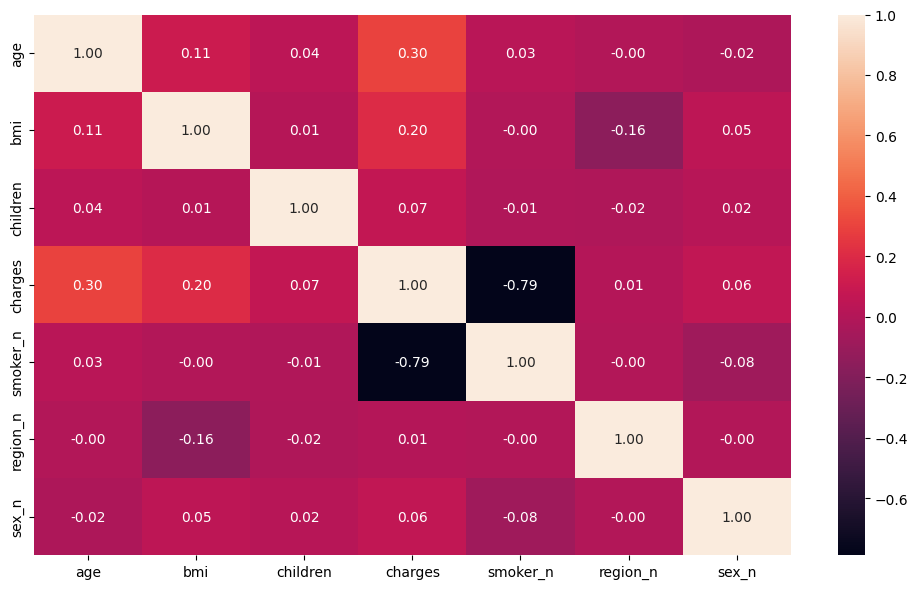

In [82]:
fig, axis = plt.subplots(figsize = (10, 6))

sns.heatmap(total_data[['age', 'bmi', 'children', 'charges',
       'smoker_n', 'region_n', 'sex_n']].corr(), annot = True, fmt = ".2f")

plt.tight_layout()

plt.show()

In this heatmap, we can observe:

1) The strongest correlation is the indirect one between charges and smoking.
2) There is a correlation, albeit not very strong, between age and charges.
3) There is a very low correlation between BMI and charges.


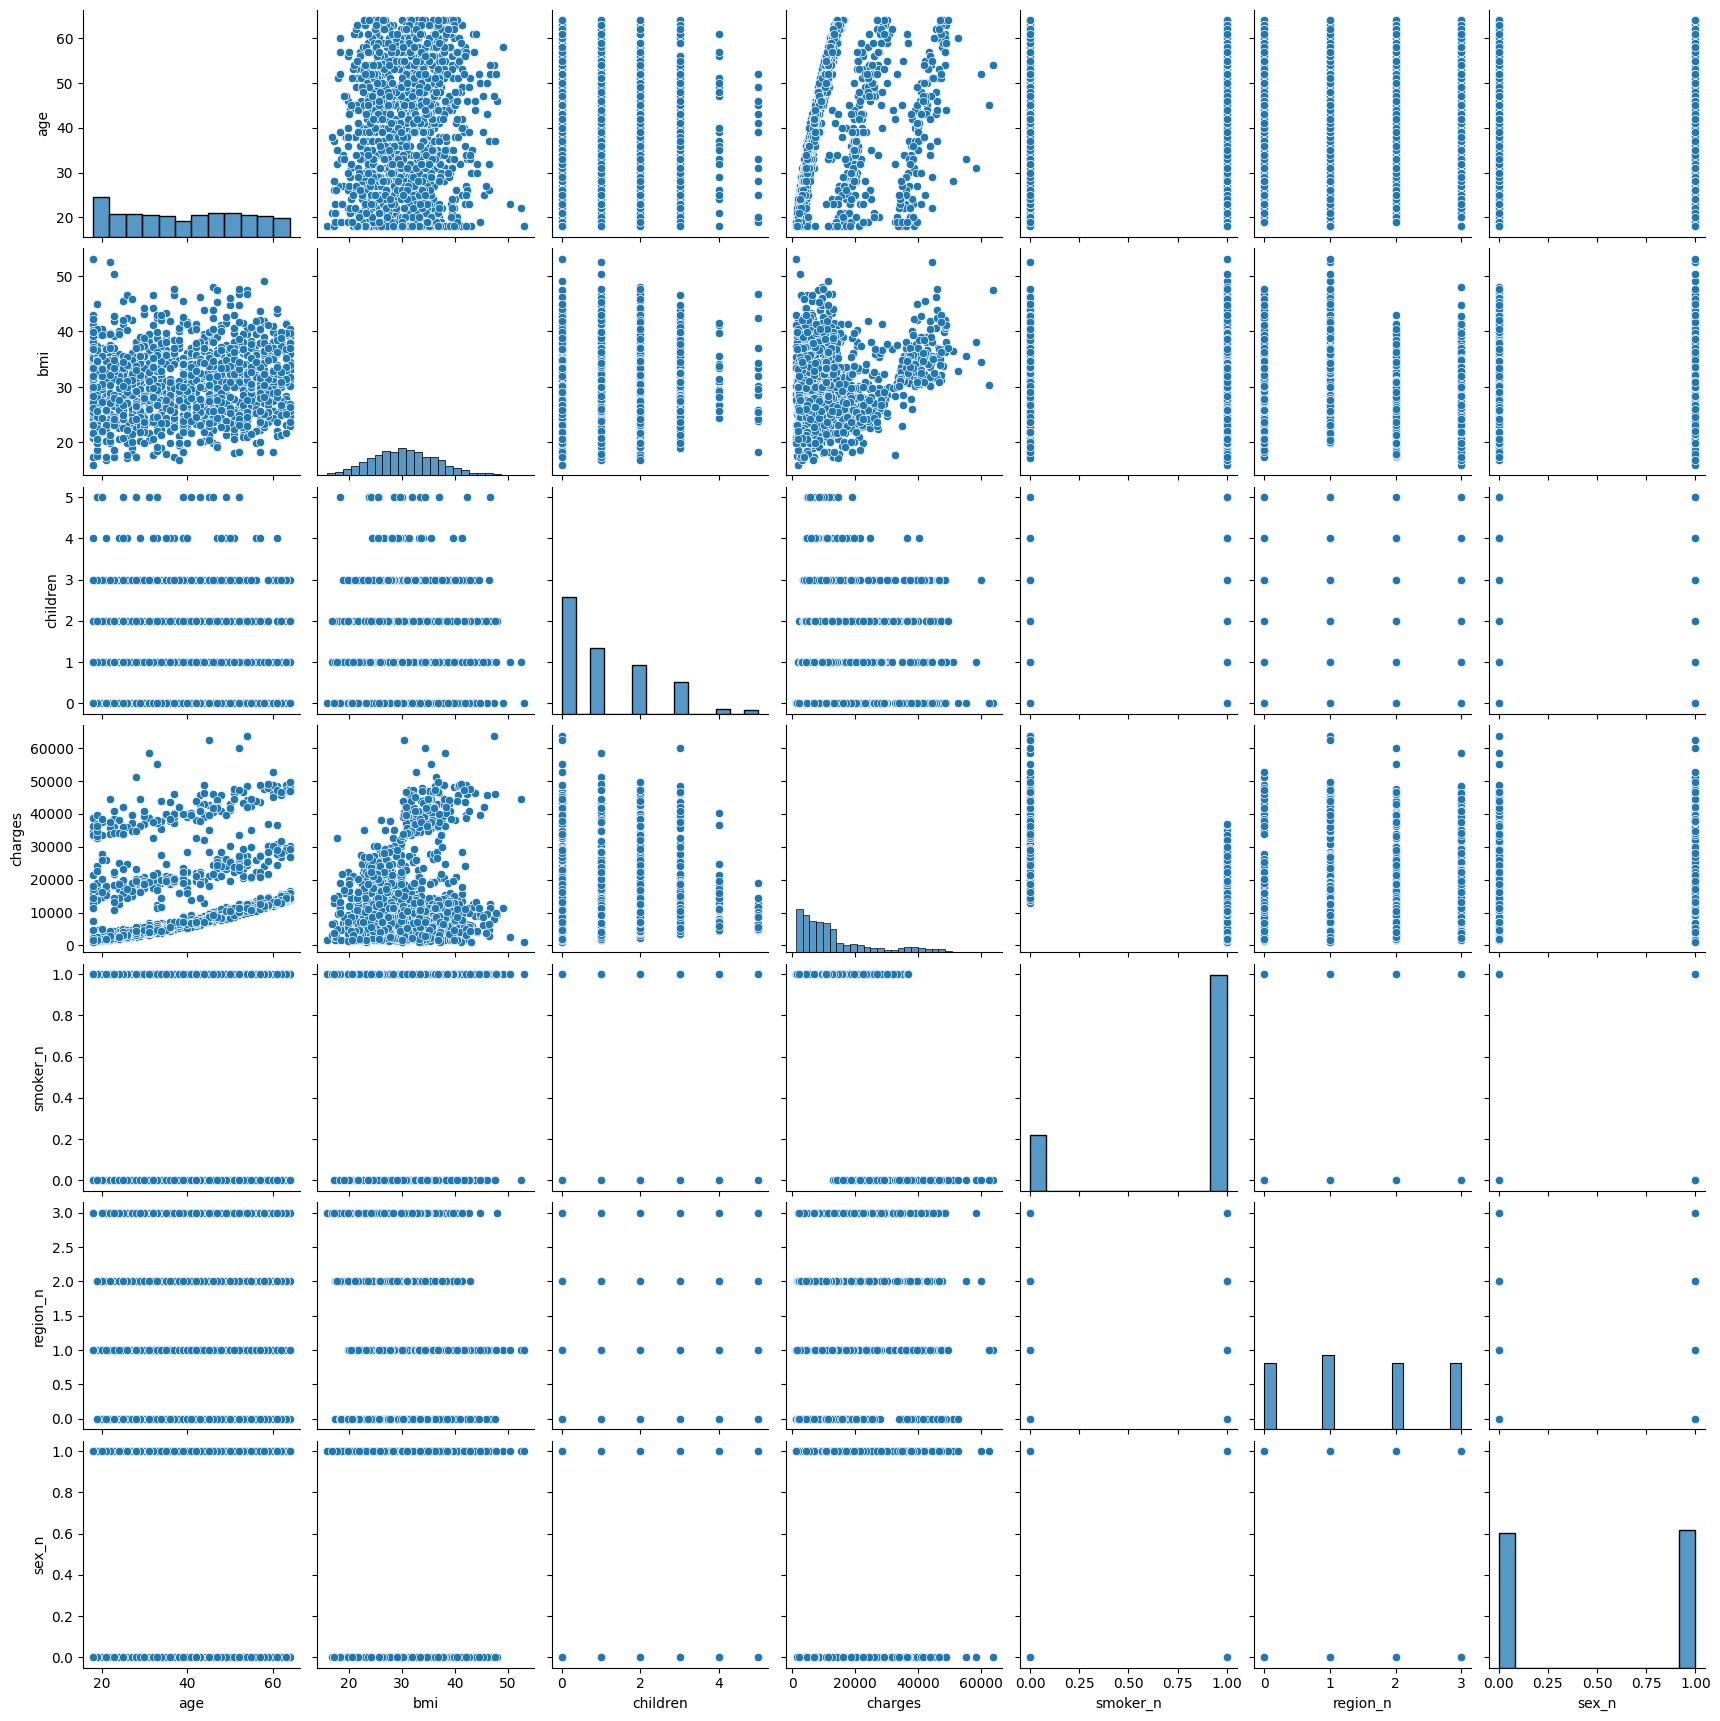

In [83]:
sns.pairplot(data = total_data)

## Feature engineering

### Outlier analysis

In [84]:
total_data.describe()

,age,bmi,children,charges,smoker_n,region_n,sex_n
count,1337.000000,1337.000000,1337.000000,1337.000000,1337.000000,1337.000000,1337.000000
mean,39.222139,30.663452,1.095737,13279.121503,0.795064,1.483919,0.504862
std,14.044333,6.100468,1.205571,12110.359677,0.403806,1.105208,0.500163
min,18.000000,15.960000,0.000000,1121.870000,0.000000,0.000000,0.000000
25%,27.000000,26.290000,0.000000,4746.340000,1.000000,1.000000,0.000000
50%,39.000000,30.400000,1.000000,9386.160000,1.000000,1.000000,1.000000
75%,51.000000,34.700000,2.000000,16657.720000,1.000000,2.000000,1.000000
max,64.000000,53.130000,5.000000,63770.430000,1.000000,3.000000,1.000000


In [85]:
total_data[total_data["charges"] > 16.658].shape

(1337, 10)

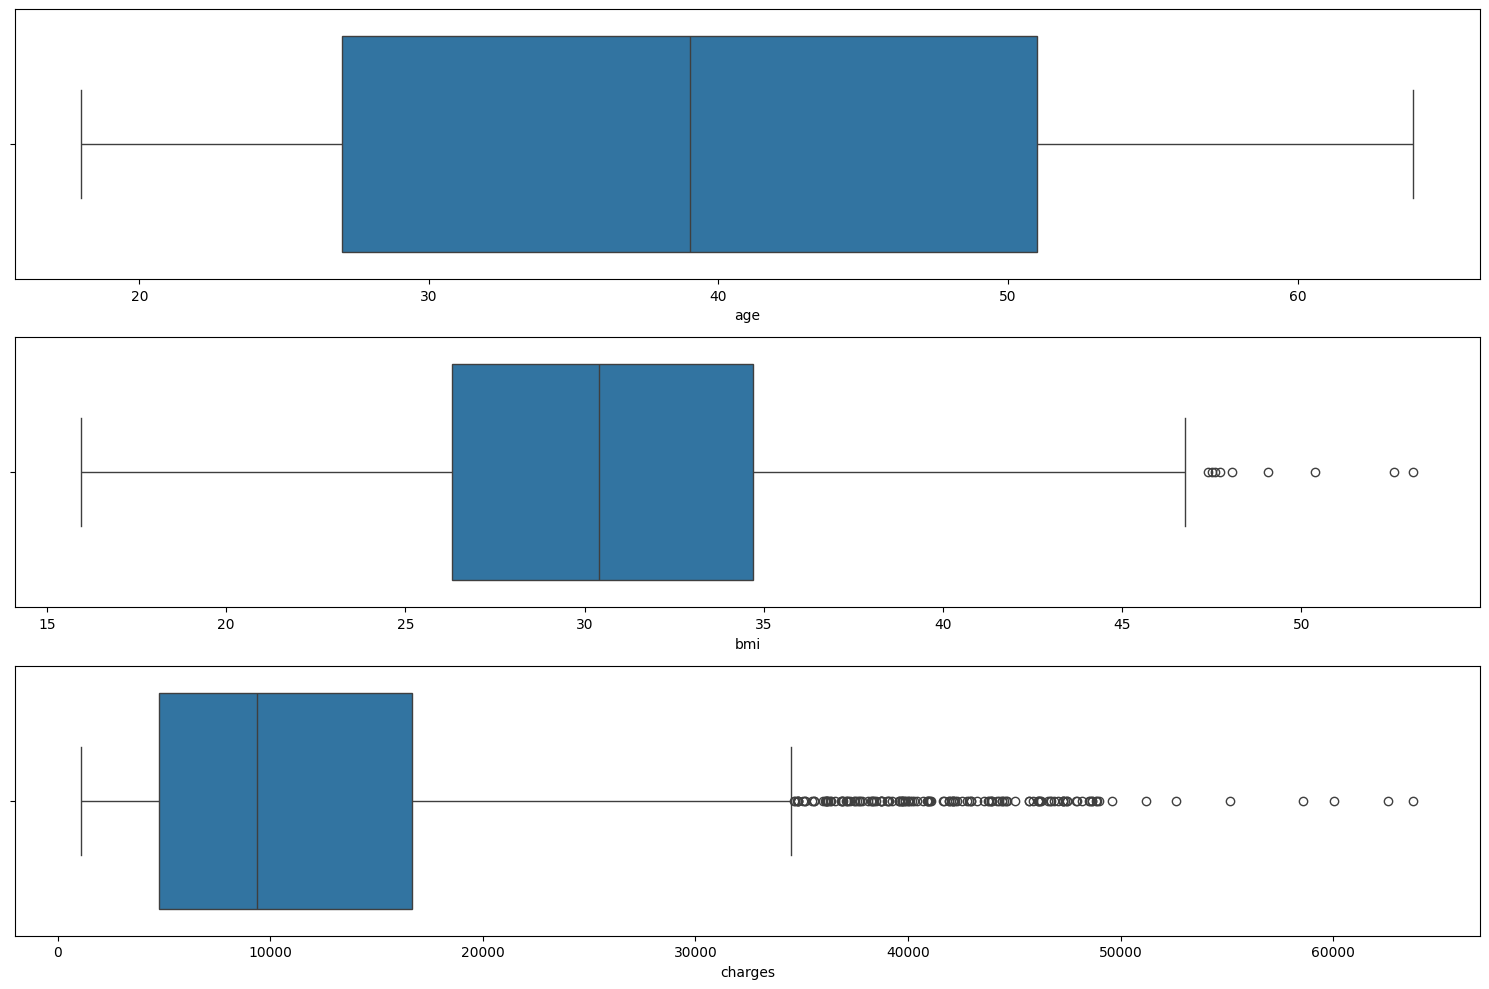

In [86]:
fig, axis = plt.subplots(3, 1, figsize = (15, 10))

sns.boxplot(ax = axis[0], data = total_data, x = "age")
sns.boxplot(ax = axis[1], data = total_data, x = "bmi")
sns.boxplot(ax = axis[2], data = total_data, x = "charges")

plt.tight_layout()

plt.show()

After observing the predictors with outliers, I have decided to keep them as they seem essential for my model.

#### Feature scaling

In [87]:
num_variables = ['age', 'bmi', 'children',
       'smoker_n', 'region_n', 'sex_n']

# We divide the dataset into training and test samples.
X = total_data[num_variables]
y = total_data["charges"]

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.2, random_state = 24)

X_train.head()

,age,bmi,children,smoker_n,region_n,sex_n
132,53,35.900,2,1,0,0
1204,18,27.280,3,0,1,0
421,61,35.860,0,0,1,1
613,34,19.000,3,1,3,0
1106,49,29.925,0,1,2,0


In [88]:
X_train.to_csv("/workspaces/machine-learning-linear-regression/data/interim/insurence_train_x.csv", index= False)
y_train.to_csv("/workspaces/machine-learning-linear-regression/data/interim/insurence_train_y.csv", index= False)
X_test.to_csv("/workspaces/machine-learning-linear-regression/data/interim/insurence_test_x.csv", index= False)
y_test.to_csv("/workspaces/machine-learning-linear-regression/data/interim/insurence_test_y.csv", index= False)

In [89]:
scaler = StandardScaler()
scaler.fit(X_train)
scaler.fit(X_test)

scal_features_train = scaler.transform(X_train)
scal_features_test = scaler.transform(X_test)

X_train_scal = pd.DataFrame(scal_features_train, index = X_train.index, columns = num_variables)
X_test_scal = pd.DataFrame(scal_features_test, index = X_test.index, columns = num_variables)

dump(scaler, open("/workspaces/machine-learning-linear-regression/models/normalized_scaler.pk", "wb"))

X_train_scal.head()

,age,bmi,children,smoker_n,region_n,sex_n
132,1.000356,0.774072,0.753122,0.560112,-1.259006,-1.045825
1204,-1.494550,-0.599139,1.570275,-1.785357,-0.375724,-1.045825
421,1.570621,0.767700,-0.881184,-1.785357,-0.375724,0.956183
613,-0.354021,-1.918187,1.570275,0.560112,1.390839,-1.045825
1106,0.715224,-0.177777,-0.881184,0.560112,0.507557,-1.045825


In [90]:
X_train_scal.to_csv("/workspaces/machine-learning-linear-regression/data/processed/insurence_train_x_scal.csv", index = False)
X_test_scal.to_csv("/workspaces/machine-learning-linear-regression/data/processed/insurence_test_x_scal.csv", index = False)

## Feature selection

In [91]:
# With a value of k = 5 we implicitly mean that we want to remove 2 features from the dataset
selection_model = SelectKBest(f_regression, k= (int(len(X_train_scal.columns)*0.70)))
selection_model.fit(X_train_scal, y_train)
ix = selection_model.get_support()
X_train_sel_70 = pd.DataFrame(selection_model.transform(X_train_scal), columns = X_train_scal.columns.values[ix])
X_test_sel_70 = pd.DataFrame(selection_model.transform(X_test_scal), columns = X_test_scal.columns.values[ix])

X_train_sel_70["charges"] = list(y_train)
X_test_sel_70["charges"] = list(y_test)

dump(selection_model, open("/workspaces/machine-learning-linear-regression/models/selection_model_70.pk", "wb"))

X_train_sel_70.head()

,age,bmi,smoker_n,sex_n,charges
0,1.000356,0.774072,0.560112,-1.045825,11163.57
1,-1.494550,-0.599139,-1.785357,-1.045825,18223.45
2,1.570621,0.767700,-1.785357,0.956183,46599.11
3,-0.354021,-1.918187,0.560112,-1.045825,6753.04
4,0.715224,-0.177777,0.560112,-1.045825,8988.16


In [92]:
X_train_sel_70.to_csv("/workspaces/machine-learning-linear-regression/data/processed/insurence_train_x_sel_70.csv", index= False)
X_test_sel_70.to_csv("/workspaces/machine-learning-linear-regression/data/processed/insurence_test_x_sel_70.csv", index= False)

In [93]:
# With a value of k = 5 we implicitly mean that we want to remove 2 features from the dataset
selection_model = SelectKBest(f_regression, k= (int(len(X_train_scal.columns)*0.60)))
selection_model.fit(X_train_scal, y_train)
ix = selection_model.get_support()
X_train_sel_60 = pd.DataFrame(selection_model.transform(X_train_scal), columns = X_train_scal.columns.values[ix])
X_test_sel_60 = pd.DataFrame(selection_model.transform(X_test_scal), columns = X_test_scal.columns.values[ix])

X_train_sel_60["charges"] = list(y_train)
X_test_sel_60["charges"] = list(y_test)

dump(selection_model, open("/workspaces/machine-learning-linear-regression/models/selection_model_60.pk", "wb"))

X_train_sel_60.head()

,age,bmi,smoker_n,charges
0,1.000356,0.774072,0.560112,11163.57
1,-1.494550,-0.599139,-1.785357,18223.45
2,1.570621,0.767700,-1.785357,46599.11
3,-0.354021,-1.918187,0.560112,6753.04
4,0.715224,-0.177777,0.560112,8988.16


In [94]:
X_train_sel_60.to_csv("/workspaces/machine-learning-linear-regression/data/processed/insurence_train_x_sel_60.csv", index= False)
X_test_sel_60.to_csv("/workspaces/machine-learning-linear-regression/data/processed/insurence_test_x_sel_60.csv", index= False)

## END OF EDA